In [35]:
import os
import glob
import pandas as pd
import pylab as pl
import seaborn as sns

import utils as util

In [8]:
srcdir = '/Users/julianarhee/Dropbox @RU Dropbox/Juliana Rhee/natalia_data/MMF-20mm'

session = '20241014'

# create a path to this session
session_dir = os.path.join(srcdir, session)
os.listdir(session_dir)

# get list of paths to -feat.mat
feat_paths = glob.glob(os.path.join(session_dir, '{}*'.format(session), '*-feat.mat'))
# print(feat_paths)

# select 1 of these
feat_path = feat_paths[0]
print(feat_path)

# get list of paths to -track.mat
track_paths = glob.glob(os.path.join(session_dir, '{}*'.format(session), '*-track.mat'))
track_path = track_paths[0]
print(track_path)

/Users/julianarhee/Dropbox @RU Dropbox/Juliana Rhee/natalia_data/MMF-20mm/20241014/20241014-1619_MMF1_Dyak-WT_4do_gh_2024-10-14-180047-0000/20241014-1619_MMF1_Dyak-WT_4do_gh_2024-10-14-180047-0000-feat.mat
/Users/julianarhee/Dropbox @RU Dropbox/Juliana Rhee/natalia_data/MMF-20mm/20241014/20241014-1619_MMF1_Dyak-WT_4do_gh_2024-10-14-180047-0000/20241014-1619_MMF1_Dyak-WT_4do_gh_2024-10-14-180047-0000-track.mat


In [9]:
feat_df = util.load_mat([feat_path])
# feat_df.head()

track_df = util.load_mat([track_path])
track_df.head()

,pos_x,pos_y,ori,major_axis_len,minor_axis_len,body_area,fg_area,img_contrast,min_fg_dist,wing_l_x,...,leg_6_x,leg_6_y,leg_1_ang,leg_2_ang,leg_3_ang,leg_4_ang,leg_5_ang,leg_6_ang,id,fpath
0,292.614057,357.674929,0.164865,117.207224,36.962741,3187.0,5834.0,0.292783,407.707001,211.0,...,352.0,356.0,-2.468113,-1.764128,0.381413,1.143141,2.877309,3.004924,0,/Users/julianarhee/Dropbox @RU Dropbox/Juliana...
1,302.707266,354.205479,0.177224,115.989454,38.373022,3358.0,5821.0,0.275393,404.969147,221.0,...,NaN,NaN,-1.590419,1.001737,3.019303,NaN,NaN,NaN,0,/Users/julianarhee/Dropbox @RU Dropbox/Juliana...
2,321.227723,344.813981,0.166128,116.180335,38.079378,3333.0,5872.0,0.275278,389.790955,241.0,...,NaN,NaN,-2.738410,-1.140798,-0.748941,1.986431,2.441699,NaN,0,/Users/julianarhee/Dropbox @RU Dropbox/Juliana...
3,338.628816,340.839744,0.178878,117.023638,37.457284,3276.0,5865.0,0.278387,385.612488,257.0,...,NaN,NaN,-2.641510,-1.345354,0.379897,1.633451,2.677930,NaN,0,/Users/julianarhee/Dropbox @RU Dropbox/Juliana...
4,361.700000,337.266358,0.242864,115.117228,37.809551,3240.0,5898.0,0.252771,382.007843,280.0,...,NaN,NaN,-2.463149,-1.889934,1.146023,2.917543,NaN,NaN,0,/Users/julianarhee/Dropbox @RU Dropbox/Juliana...


In [11]:
# look at columns of feat df
print(feat_df.columns)

Index(['vel', 'ang_vel', 'min_wing_ang', 'max_wing_ang', 'mean_wing_length',
       'axis_ratio', 'fg_body_ratio', 'contrast', 'dist_to_wall', 'id',
       'fpath'],
      dtype='object')


In [12]:
# look at columns of track df
print(track_df.columns)

Index(['pos_x', 'pos_y', 'ori', 'major_axis_len', 'minor_axis_len',
       'body_area', 'fg_area', 'img_contrast', 'min_fg_dist', 'wing_l_x',
       'wing_l_y', 'wing_r_x', 'wing_r_y', 'wing_l_ang', 'wing_l_len',
       'wing_r_ang', 'wing_r_len', 'leg_1_x', 'leg_1_y', 'leg_2_x', 'leg_2_y',
       'leg_3_x', 'leg_3_y', 'leg_4_x', 'leg_4_y', 'leg_5_x', 'leg_5_y',
       'leg_6_x', 'leg_6_y', 'leg_1_ang', 'leg_2_ang', 'leg_3_ang',
       'leg_4_ang', 'leg_5_ang', 'leg_6_ang', 'id', 'fpath'],
      dtype='object')


## Combine -track and -feat dataframes

In [24]:
# get a list of the columns that are in -track but not in -feat
track_cols = [c for c in track_df.columns if c not in feat_df.columns]

df = pd.concat([ track_df[track_cols], feat_df ], axis=1)
df.head()

,pos_x,pos_y,ori,major_axis_len,minor_axis_len,body_area,fg_area,img_contrast,min_fg_dist,wing_l_x,...,ang_vel,min_wing_ang,max_wing_ang,mean_wing_length,axis_ratio,fg_body_ratio,contrast,dist_to_wall,id,fpath
0,292.614057,357.674929,0.164865,117.207224,36.962741,3187.0,5834.0,0.292783,407.707001,211.0,...,0.370746,0.026982,0.082115,1.500476,3.170956,1.830562,0.292783,3.293802,0,/Users/julianarhee/Dropbox @RU Dropbox/Juliana...
1,302.707266,354.205479,0.177224,115.989454,38.373022,3358.0,5821.0,0.275393,404.969147,221.0,...,0.361281,0.036580,0.073012,1.494124,3.066831,1.764821,0.279712,3.400632,0,/Users/julianarhee/Dropbox @RU Dropbox/Juliana...
2,321.227723,344.813981,0.166128,116.180335,38.079378,3333.0,5872.0,0.275278,389.790955,241.0,...,0.354756,0.033013,0.074032,1.488127,3.062220,1.761829,0.276084,3.537578,0,/Users/julianarhee/Dropbox @RU Dropbox/Juliana...
3,338.628816,340.839744,0.178878,117.023638,37.457284,3276.0,5865.0,0.278387,385.612488,257.0,...,0.754371,0.035549,0.064698,1.498734,3.086011,1.790683,0.271206,3.718574,0,/Users/julianarhee/Dropbox @RU Dropbox/Juliana...
4,361.700000,337.266358,0.242864,115.117228,37.809551,3240.0,5898.0,0.252771,382.007843,280.0,...,1.674992,0.037856,0.058278,1.514228,3.064621,1.806212,0.263483,3.919102,0,/Users/julianarhee/Dropbox @RU Dropbox/Juliana...


In [52]:
print(track_df.shape, feat_df.shape, df.shape)

(324000, 37) (324000, 11) (324000, 46)


## Plot something

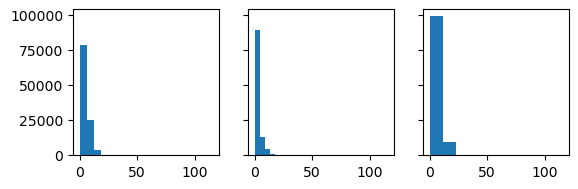

In [47]:
fig, axn = pl.subplots(1, 3, sharex=True, sharey=True)

# ax=axn[0]
# ax.hist(df[(df['id']==0)]['vel'])
# ax.set_box_aspect(1)

# ax=axn[1]
# ax.hist(df[(df['id']==1)]['vel'])
# ax.set_box_aspect(1)

# ax=axn[2]
# ax.hist(df[(df['id']==2)]['vel'])
# ax.set_box_aspect(1)

for i, (id_value, id_df) in enumerate( df.groupby('id') ):
    ax = axn[i]
    ax.hist( df[df['id']==id_value]['vel'] )
    ax.set_box_aspect(1)

<Axes: xlabel='vel', ylabel='Probability'>

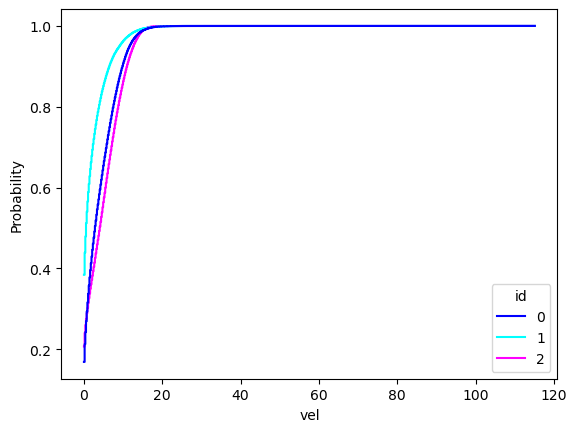

In [48]:
fig, ax = pl.subplots()

id_palette = {0: 'blue', 1: 'cyan', 2: 'magenta'}
sns.histplot(data=df, x='vel', hue='id', ax=ax, 
             palette=id_palette,
             stat='probability', common_norm=False, 
             cumulative=True, fill=False, element='step')

## Assignment 1

In [ ]:
# Replot the above but replace the 0, 1, 2 to be wingless/winged males and female 
# Clue: Use a dictionary to create a LUT for ID # and named label
{0: 'female', 1: 'wingless male', 2: 'winged male'}  # etc. 

## Assignment 2

In [ ]:
# Combine data from 2 videos 
# Clue: you can concatenate dataframes vertically (along columns) or horizontally (along rows) 
# dataframe1 - will have own unique fpath
# dataframe2 - will have own unique fpath

df = pd.concat([ dataframe1, dataframe2], axis=0)